In [1]:
import tensorflow as tf
import os

tf.__version__ 

2023-09-14 11:22:25.842600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 11:22:28.298660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.13.0'

In [2]:
# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2023-09-14 11:22:31.929014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:22:32.551291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:22:32.551363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# Remove dodgy images
import cv2
import imghdr
import matplotlib.pyplot as plt

data_dir = "img_data"
data_dir = "/mnt/c/Users/Admin/Desktop/images/img_data"

In [5]:
# Image extensions
image_exts = ['jpeg','jpg', 'bmp', 'png', 'gif']

# Exclude bad images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1423 files belonging to 2 classes.


2023-09-14 11:25:57.560348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:25:57.560541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:25:57.560668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:26:00.352327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 11:26:00.352395: I tensorflow/compile

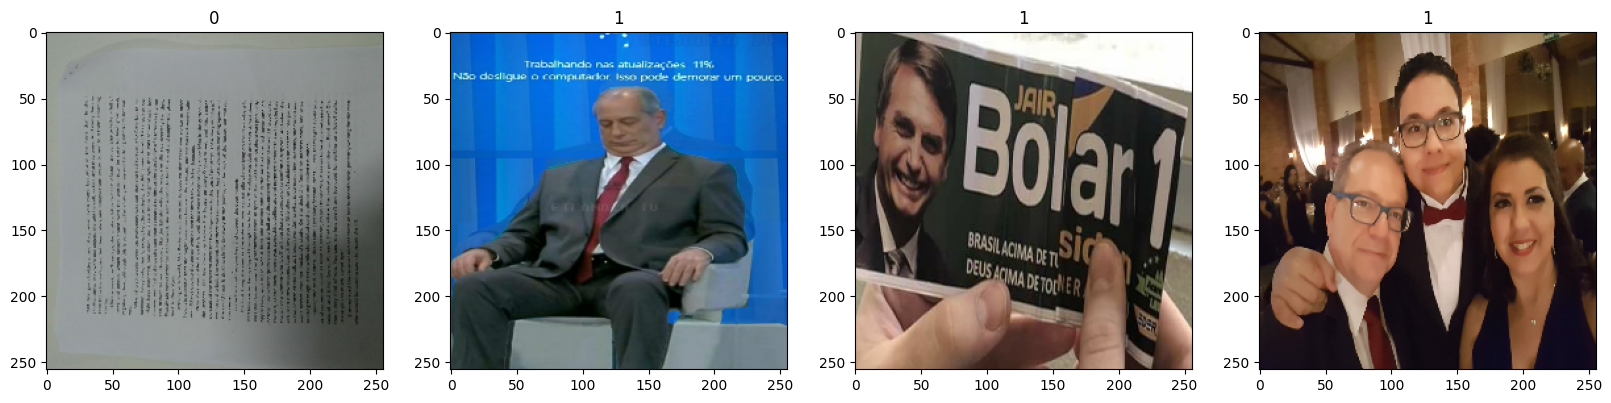

In [7]:
# Creat an iterator
data_iterator = data.as_numpy_iterator()

# Get another batch from the iterator
batch = data_iterator.next()

# Plot the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



## Preprocess Data :D 


In [8]:
# Normalize the pixels values
data = data.map(lambda x, y: (x / 255, y))

# Get the iterator 
scaled_iterator = data.as_numpy_iterator()

# Get a batch
batch = scaled_iterator.next()

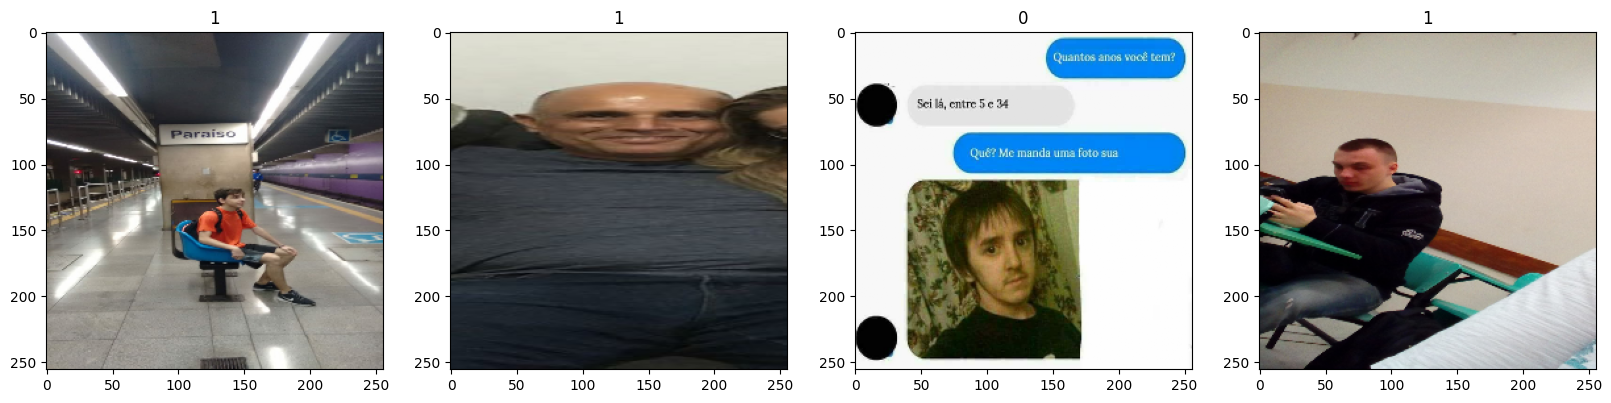

In [22]:
# Plot it
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# Split the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

# Get the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


## Deep Model


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
# Create the model :)

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3686656   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3696625 (14.10 MB)
Trainable params: 3696625 (14.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
log_dir = "logs"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
31/31 [==============================] - 21s 509ms/step - loss: 0.6775 - accuracy: 0.6250 - val_loss: 0.6391 - val_accuracy: 0.6375
Epoch 2/10
31/31 [==============================] - 15s 451ms/step - loss: 0.5513 - accuracy: 0.7530 - val_loss: 0.6388 - val_accuracy: 0.6406
Epoch 3/10
31/31 [==============================] - 15s 445ms/step - loss: 0.4374 - accuracy: 0.8024 - val_loss: 0.3864 - val_accuracy: 0.8531
Epoch 4/10
31/31 [==============================] - 15s 427ms/step - loss: 0.3183 - accuracy: 0.8700 - val_loss: 0.4129 - val_accuracy: 0.8188
Epoch 5/10
31/31 [==============================] - 17s 504ms/step - loss: 0.3031 - accuracy: 0.8810 - val_loss: 0.4100 - val_accuracy: 0.8281
Epoch 6/10
31/31 [==============================] - 17s 503ms/step - loss: 0.2642 - accuracy: 0.8952 - val_loss: 0.3768 - val_accuracy: 0.8500
Epoch 7/10
31/31 [==============================] - 17s 493ms/step - loss: 0.2105 - accuracy: 0.9133 - val_loss: 0.3500 - val_accuracy: 0.8656

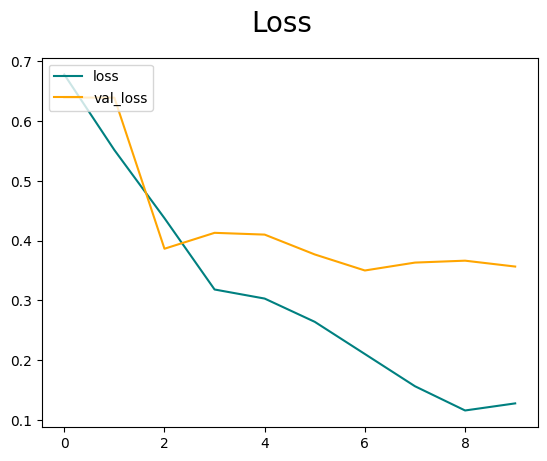

In [29]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

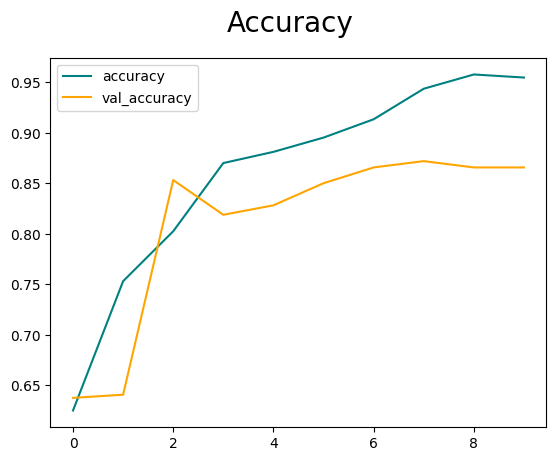

In [30]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate Performance

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
# Instantiate the metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
# Use the test data
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")


1/1 [==============================] - 0s 88ms/step
Precision: 0.7260273694992065, Recall: 0.9464285969734192, Accuracy: 0.792792797088623


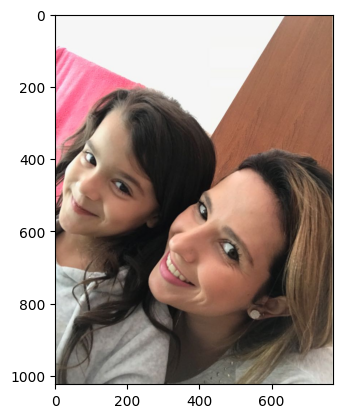

In [47]:
# Test the model
import cv2

img = cv2.imread(r"/mnt/c/Users/Admin/Desktop/images/img_data/memories/IMG-20180527-WA0018.jpg")
# img = cv2.imread(r"/home/breno/codes/data-science/img_data/garbage/IMG-20180512-WA0026.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

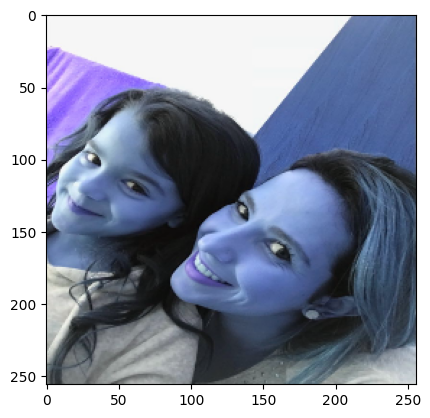

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 27ms/step


array([[0.9836466]], dtype=float32)

In [50]:
if yhat > 0.9:
    print("This image is a memory")
else:
    print("This image is garbage")

This image is a memory


## Save this model


In [51]:
from tensorflow.keras.models import load_model

# Save it :)
model.save(os.path.join('models', 'MemoryGarbageModelv1.h5'))

In [52]:
# Load model :)
new_model = load_model(os.path.join('models', 'MemoryGarbageModelv1.h5'))

yhat = new_model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5:
    print("This image is a memory")
else:
    print("This image is garbage")

1/1 [==============================] - 0s 74ms/step
This image is a memory
